<a href="https://colab.research.google.com/github/sasaxton15/Sax-Brainstoming-Project-/blob/master/Copy_of_Copy_of_COVID_19_Tracker(Negative_cases_by_US_States).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt  
import numpy as np
import matplotlib.ticker as ticker 
from matplotlib.dates import DateFormatter 
import datetime as dt 

## Importing the dataset

In [15]:
df = pd.read_json('https://covidtracking.com/api/states/daily', ) 



In [16]:
print (df)

          date state  positive  ...  positiveScore  score  grade
0     20200714    AK    1579.0  ...              0      0       
1     20200714    AL   57255.0  ...              0      0       
2     20200714    AR   29733.0  ...              0      0       
3     20200714    AS       0.0  ...              0      0       
4     20200714    AZ  128097.0  ...              0      0       
...        ...   ...       ...  ...            ...    ...    ...
7348  20200126    WA       2.0  ...              0      0       
7349  20200125    WA       2.0  ...              0      0       
7350  20200124    WA       2.0  ...              0      0       
7351  20200123    WA       2.0  ...              0      0       
7352  20200122    WA       2.0  ...              0      0       

[7353 rows x 41 columns]


In [17]:
print (df.columns)

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')


#Restructing dataset that you want to see 

In [18]:
states = ['TX', 'CA', 'NY', 'AZ', 'FL']
df = df[df['state'].isin(states)] 




In [19]:
print (df)

          date state  positive  ...  positiveScore  score  grade
4     20200714    AZ  128097.0  ...              0      0       
5     20200714    CA  336508.0  ...              0      0       
10    20200714    FL  291629.0  ...              0      0       
37    20200714    NY  403175.0  ...              0      0       
47    20200714    TX  275058.0  ...              0      0       
...        ...   ...       ...  ...            ...    ...    ...
7290  20200304    AZ       2.0  ...              0      0       
7291  20200304    CA      53.0  ...              0      0       
7292  20200304    FL       2.0  ...              0      0       
7298  20200304    NY       6.0  ...              0      0       
7302  20200304    TX       1.0  ...              0      0       

[665 rows x 41 columns]


In [20]:
df['Cases'] = df[['negative']].sum(axis=1)

In [21]:
df = df.pivot(index= 'date', columns='state', values='Cases')  
states = list(df.columns)
covid = df.reset_index('date')
covid.set_index(['date'],inplace=True)
covid.columns = states


In [22]:
print (df)

state           AZ         CA         FL         NY         TX
date                                                          
20200304      27.0      462.0       24.0       48.0        0.0
20200305      28.0      462.0       31.0       76.0        0.0
20200306      33.0      462.0       55.0       92.0        0.0
20200307      44.0      462.0      100.0       92.0        0.0
20200308      44.0      462.0      118.0       92.0        0.0
...            ...        ...        ...        ...        ...
20200710  552319.0  4871440.0  2177476.0  4141275.0  2149678.0
20200711  564060.0  4963351.0  2220788.0  4209748.0  2179162.0
20200712  573705.0  5085795.0  2304196.0  4271489.0  2234096.0
20200713  578602.0  5215203.0  2357139.0  4322619.0  2275812.0
20200714  593846.0  5338447.0  2393614.0  4381752.0  2323622.0

[133 rows x 5 columns]


# Section 2 - Loading and Selecting Data

In [23]:
print(covid)

                AZ         CA         FL         NY         TX
date                                                          
20200304      27.0      462.0       24.0       48.0        0.0
20200305      28.0      462.0       31.0       76.0        0.0
20200306      33.0      462.0       55.0       92.0        0.0
20200307      44.0      462.0      100.0       92.0        0.0
20200308      44.0      462.0      118.0       92.0        0.0
...            ...        ...        ...        ...        ...
20200710  552319.0  4871440.0  2177476.0  4141275.0  2149678.0
20200711  564060.0  4963351.0  2220788.0  4209748.0  2179162.0
20200712  573705.0  5085795.0  2304196.0  4271489.0  2234096.0
20200713  578602.0  5215203.0  2357139.0  4322619.0  2275812.0
20200714  593846.0  5338447.0  2393614.0  4381752.0  2323622.0

[133 rows x 5 columns]


# Section 6 - Generating Colours and Style

In [24]:
colors = {'AZ':'#045275', 'CA':'#089099', 'FL':'#7CCBA2', 'NY':'#7C1D6F', 'TX':'#DC3977'}
plt.style.use('fivethirtyeight') 



# Section 8 - Creating Visualizations of Negative Cases by US States 


Text(20200714, -100000, 'Source: https://covidtracking.com/api/states/daily')

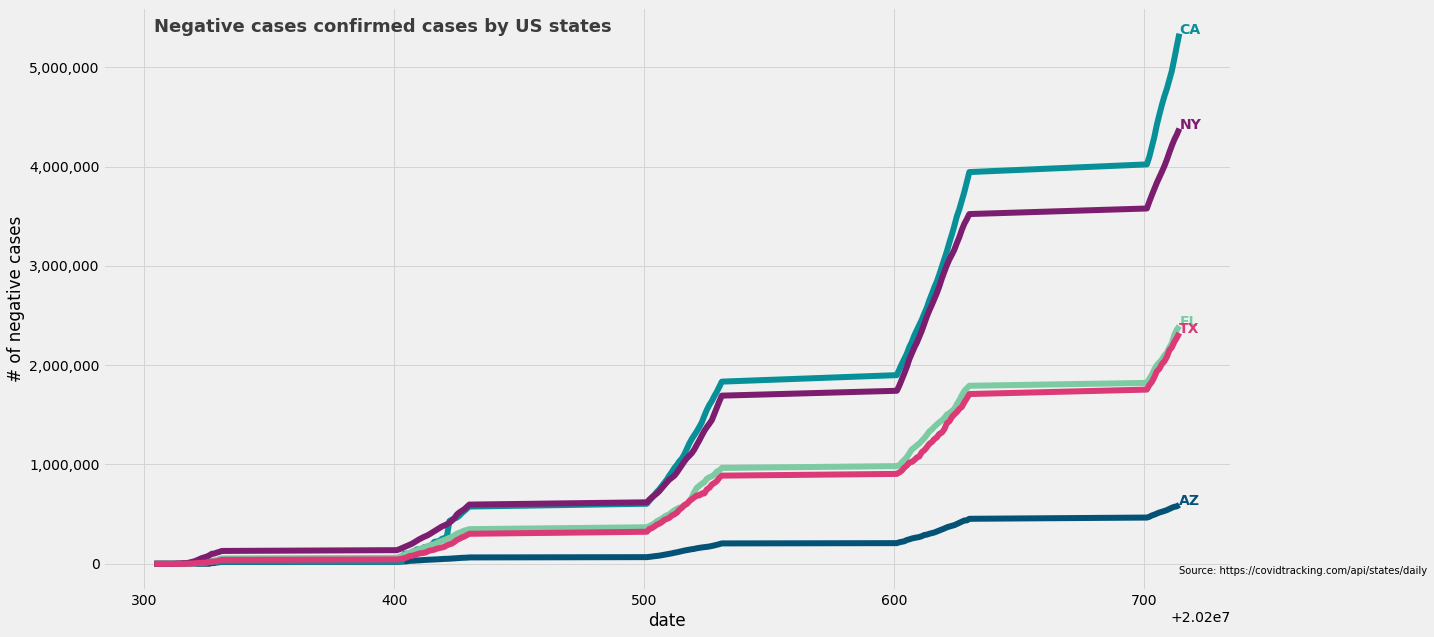

In [27]:
plot = covid.plot(figsize=(18,10), color=list(colors.values()), linewidth=6, legend=False)
 
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('date')
plot.set_ylabel('# of negative cases') 
 
  
for state in list(colors.keys()):  
    plot.text(x = covid.index[-1], y = covid[state].max(), color = colors[state], s = state, weight = 'bold')  
plot.text(x = covid.index[0], y = int(covid.max().max())+15000,  s = "Negative cases confirmed cases by US states", fontsize = 18, weight = 'bold', alpha = .75)
plot.text(x = covid.index[-1], y = -100000, s = 'Source: https://covidtracking.com/api/states/daily',  fontsize = 10)

# Section 9 - Adding Labels 

#Forecasting the US Coronavirus 